In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [33]:
data = pd.read_csv("../Unit Economics.csv")
data

,Amazon store,Start date,End date,Parent ASIN,ASIN,FNSKU,MSKU,Currency code,Average sales price,Units sold,...,RefundCommissionFee per unit,RefundCommissionFee quantity,RefundCommissionFee total,Sponsored Products charge per unit,Sponsored Products charge quantity,Sponsored Products charge total,Cost of goods sold per unit,Miscellaneous cost per unit,Net proceeds total,Net proceeds per unit
0,IN,03/25/2024,09/24/2024,B0BY4N8VBM,B0BY4N8VBM,NaN,Arm_B_L/XL,INR,799.00,116,...,82.6,18.0,1486.8,8.96,1337.0,11975.47,240.0,NaN,25041.1697,221.34
1,IN,03/25/2024,09/24/2024,B0B8Z31FG6,B0B8Z31FG6,NaN,GB-AL-ME-L/XL_FBA,INR,506.32,114,...,82.6,12.0,991.2,19.79,514.0,10173.65,NaN,NaN,29515.3870,292.23
2,IN,03/25/2024,09/24/2024,B0BY4R9CPR,B0BY4R9CPR,NaN,Arm_B_S/SM,INR,500.58,97,...,82.6,15.0,1239.0,9.75,1922.0,18741.00,NaN,NaN,9029.3006,110.11
3,IN,03/25/2024,09/24/2024,B0B8Z31FG6,B0B8Z31FG6,NaN,BAL GAL L/XL FBA,INR,498.94,85,...,82.6,5.0,413.0,24.69,366.0,9035.12,NaN,NaN,21767.4173,282.69
4,IN,03/25/2024,09/24/2024,B0BY4QV6CH,B0BY4QV6CH,NaN,Arm_G_S/SM,INR,486.99,72,...,82.6,12.0,991.2,6.37,2872.0,18293.63,NaN,NaN,1880.0890,31.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,IN,03/25/2024,09/24/2024,B0D5457JSV,B0C697GTFY,NaN,TG-CS-S/M,INR,0.00,0,...,NaN,NaN,NaN,13.75,33.0,453.86,NaN,NaN,-453.8600,NaN
215,IN,03/25/2024,09/24/2024,B09CDPY2XB,B09CDPY2XB,NaN,T-KL,INR,0.00,0,...,NaN,NaN,NaN,33.95,9.0,305.52,NaN,NaN,-305.5200,NaN
216,IN,03/25/2024,09/24/2024,B0D5457JSV,B0C6DMB24R,NaN,TT-CS-L/XL,INR,0.00,0,...,NaN,NaN,NaN,20.69,18.0,372.48,NaN,NaN,-372.4800,NaN
217,IN,03/25/2024,09/24/2024,B0D5457JSV,B0C6DP2L7Y,NaN,TT-CS-S/M,INR,0.00,0,...,NaN,NaN,NaN,9.36,24.0,224.60,NaN,NaN,-224.6000,NaN


#Conver the data to numerical types where possible:

In [40]:
#Convert the data to numeric types where possible
data['Sales Volume'] = pd.to_numeric(data['Units sold'], errors='coerce')
data['Revenue'] = pd.to_numeric(data['Net sales'], errors='coerce')
data['COGS'] = pd.to_numeric(data['Cost of goods sold per unit'] * data['Units sold'], errors='coerce')
data['Gross Profit'] = pd.to_numeric(data['Net proceeds total'], errors='coerce')
data['Inventory Levels'] = pd.to_numeric(data['Units sold'], errors='coerce')
data['Returns and Refunds'] = pd.to_numeric(data['Units returned'], errors='coerce')
data['Marketing Spend'] = pd.to_numeric(data['Sponsored Products charge total'], errors='coerce')

In [55]:
data

,Amazon store,Start date,End date,Parent ASIN,ASIN,FNSKU,MSKU,Currency code,Average sales price,Units sold,...,Revenue,COGS,Gross Profit,Inventory Levels,Returns and Refunds,Marketing Spend,Profit Margin,Inventory Turnover,Return Rate,Marketing Efficiency
0,IN,03/25/2024,09/24/2024,B0BY4N8VBM,B0BY4N8VBM,0.0,Arm_B_L/XL,INR,799.00,116,...,46363.1497,27840.0,25041.1697,116,21,11975.47,54.010933,1.0,18.103448,387.150982
1,IN,03/25/2024,09/24/2024,B0B8Z31FG6,B0B8Z31FG6,0.0,GB-AL-ME-L/XL_FBA,INR,506.32,114,...,51307.8596,0.0,29515.3870,114,13,10173.65,57.526054,1.0,11.403509,504.321061
2,IN,03/25/2024,09/24/2024,B0BY4R9CPR,B0BY4R9CPR,0.0,Arm_B_S/SM,INR,500.58,97,...,41178.1900,0.0,9029.3006,97,15,18741.00,21.927386,1.0,15.463918,219.722480
3,IN,03/25/2024,09/24/2024,B0B8Z31FG6,B0B8Z31FG6,0.0,BAL GAL L/XL FBA,INR,498.94,85,...,38484.0899,0.0,21767.4173,85,8,9035.12,56.562120,1.0,9.411765,425.938891
4,IN,03/25/2024,09/24/2024,B0BY4QV6CH,B0BY4QV6CH,0.0,Arm_G_S/SM,INR,486.99,72,...,29125.9500,0.0,1880.0890,72,12,18293.63,6.455031,1.0,16.666667,159.213617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,IN,03/25/2024,09/24/2024,B0D5457JSV,B0C697GTFY,0.0,TG-CS-S/M,INR,0.00,0,...,0.0000,0.0,-453.8600,0,0,453.86,-inf,NaN,NaN,0.000000
215,IN,03/25/2024,09/24/2024,B09CDPY2XB,B09CDPY2XB,0.0,T-KL,INR,0.00,0,...,0.0000,0.0,-305.5200,0,0,305.52,-inf,NaN,NaN,0.000000
216,IN,03/25/2024,09/24/2024,B0D5457JSV,B0C6DMB24R,0.0,TT-CS-L/XL,INR,0.00,0,...,0.0000,0.0,-372.4800,0,0,372.48,-inf,NaN,NaN,0.000000
217,IN,03/25/2024,09/24/2024,B0D5457JSV,B0C6DP2L7Y,0.0,TT-CS-S/M,INR,0.00,0,...,0.0000,0.0,-224.6000,0,0,224.60,-inf,NaN,NaN,0.000000


In [41]:
#Calculate profit margins
data['Profit Margin'] = (data['Gross Profit'] / data['Revenue']) * 100

#Calculate inventory turnover
data['Inventory Turnover'] = data['Sales Volume'] / data['Inventory Levels']

#Calculate return rates
data['Return Rate'] = (data['Returns and Refunds'] / data['Sales Volume']) * 100

#Calculate marketing efficiency (ROI)
data['Marketing Efficiency'] = (data['Revenue'] / data['Marketing Spend']) * 100

In [42]:
#Profitability Analysis
profitable_skus = data.sort_values(by='Gross Profit', ascending=False).head(10)
unprofitable_skus = data.sort_values(by='Gross Profit', ascending=True).head(10)

print("Top 10 Most Profitable SKUs:")
print(profitable_skus[['ASIN', 'Gross Profit']])

print("\nTop 10 Least Profitable SKUs:")
print(unprofitable_skus[['ASIN', 'Gross Profit']])

Top 10 Most Profitable SKUs:
          ASIN  Gross Profit
1   B0B8Z31FG6    29515.3870
0   B0BY4N8VBM    25041.1697
3   B0B8Z31FG6    21767.4173
5   B0BY4R9CPR    15158.5797
12  B09JSDSL58    14528.9700
11  B0C65YFTTL    13845.3706
2   B0BY4R9CPR     9029.3006
14  B0BY4N8VBM     8577.9000
8   B0BY4RY4JS     8522.9500
24  B09LHM8YNY     6854.2178

Top 10 Least Profitable SKUs:
           ASIN  Gross Profit
7    B0BY4Q79NV    -5340.1279
32   B0BY4RWPG7    -5108.8000
60   B0CNT2WTVX    -2947.7600
13   B0C6DHZ5QW    -2622.2641
43   B0BY4QV6CH    -2538.7943
55   B0B8Z31FG6    -1968.3372
150  B0BTPFXZY2    -1485.2300
42   B0CNT2WXQS    -1171.7800
142  B0B1MWZ21J    -1034.0900
186  B0C69B4D3K     -975.8000


In [43]:
#Cost Control
high_cogs_skus = data.sort_values(by='COGS', ascending=False).head(10)

print("\nTop 10 SKUs with High COGS:")
print(high_cogs_skus[['ASIN', 'COGS']])


Top 10 SKUs with High COGS:
           ASIN     COGS
0    B0BY4N8VBM  27840.0
150  B0BTPFXZY2      0.0
139  B09Y5F44PX      0.0
140  B09Y5F44PX      0.0
141  B0C85W4TDM      0.0
142  B0B1MWZ21J      0.0
143  B0B1MWV2D3      0.0
144  B0B1MXHW4H      0.0
145  B09Y5DZR1B      0.0
146  B0C85NFZKR      0.0


In [44]:
#Inventory Optimisation
low_inventory_turnover_skus = data.sort_values(by='Inventory Turnover', ascending=True).head(10)

print("\nTop 10 SKUs with Low Inventory Turnover:")
print(low_inventory_turnover_skus[['ASIN', 'Inventory Turnover']])


Top 10 SKUs with Low Inventory Turnover:
           ASIN  Inventory Turnover
0    B0BY4N8VBM                 1.0
108  B0CNH42WXR                 1.0
109  B09Y5D7RZW                 1.0
110  B0C85M4XRT                 1.0
111  B09Y5CVXP4                 1.0
112  B09Y5CVXP4                 1.0
113  B09CDQ6ZDL                 1.0
114  B0C9JBPV3W                 1.0
115  B0C6DPMQVC                 1.0
116  B0C6DQWNFH                 1.0


In [45]:
#Return Rates
high_return_rate_skus = data.sort_values(by='Return Rate', ascending=False).head(10)

print("\nTop 10 SKUs with High Return Rates:")
print(high_return_rate_skus[['ASIN', 'Return Rate']])


Top 10 SKUs with High Return Rates:
           ASIN  Return Rate
197  B09CDMP5G4          inf
160  B0CNVKBKDW   100.000000
148  B0C85LGYMG   100.000000
95   B0CNSZNY85    75.000000
104  B09CDQYGGM    66.666667
32   B0BY4RWPG7    52.380952
116  B0C6DQWNFH    50.000000
30   B09CDH8LPW    50.000000
117  B0C697SGYD    50.000000
122  B0BTPJR7XJ    50.000000


In [46]:
#Marketing Efficiency
inefficient_marketing_skus = data.sort_values(by='Marketing Efficiency', ascending=True).head(10)

print("\nTop 10 SKUs with Inefficient Marketing:")
print(inefficient_marketing_skus[['ASIN', 'Marketing Efficiency']])


Top 10 SKUs with Inefficient Marketing:
           ASIN  Marketing Efficiency
197  B09CDMP5G4                  -inf
217  B0C6DP2L7Y                   0.0
196  B0BTPTFDWM                   0.0
195  B0BTPTFDWM                   0.0
192  B0BTPHHWCR                   0.0
190  B0BXXF61YM                   0.0
188  B09LM24XCK                   0.0
187  B09LMGSBQF                   0.0
186  B0C69B4D3K                   0.0
185  B09LHJFMKP                   0.0


#Visual Representation:

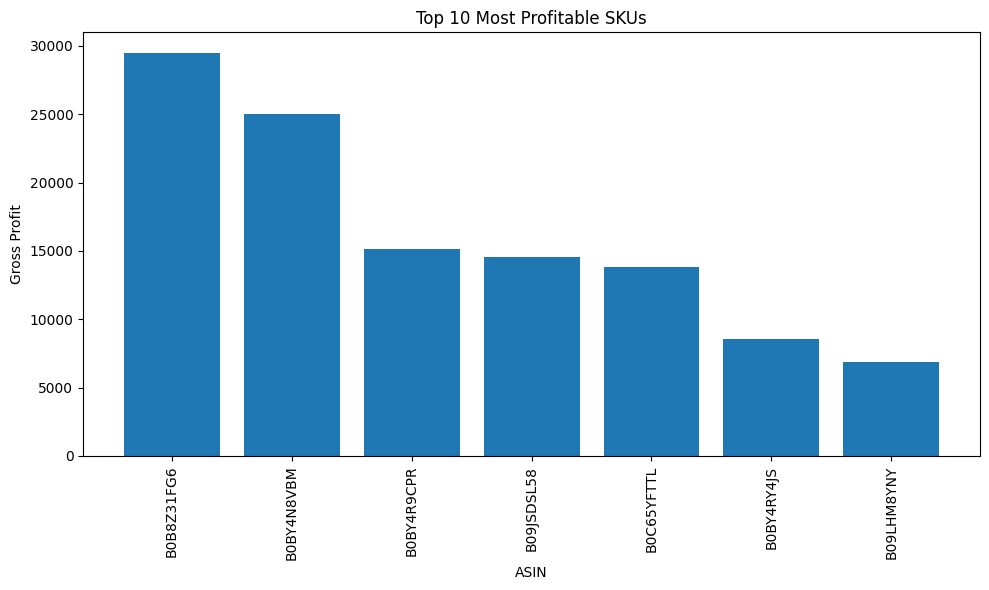

In [49]:
#Visual representation
plt.figure(figsize=(10, 6))
plt.bar(profitable_skus['ASIN'], profitable_skus['Gross Profit'])
plt.title('Top 10 Most Profitable SKUs')
plt.xlabel('ASIN')
plt.ylabel('Gross Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

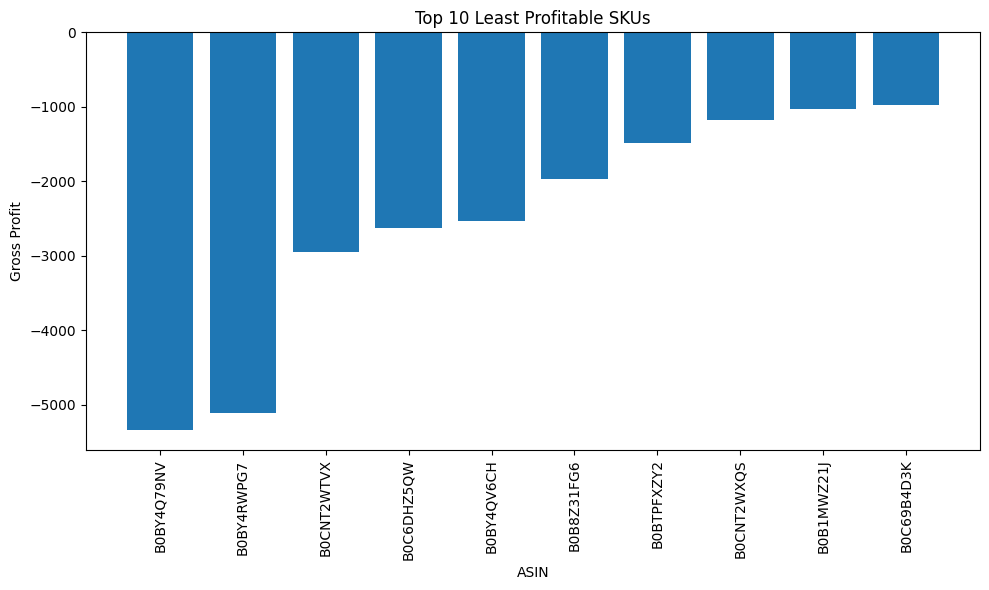

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(unprofitable_skus['ASIN'], unprofitable_skus['Gross Profit'])
plt.title('Top 10 Least Profitable SKUs')
plt.xlabel('ASIN')
plt.ylabel('Gross Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

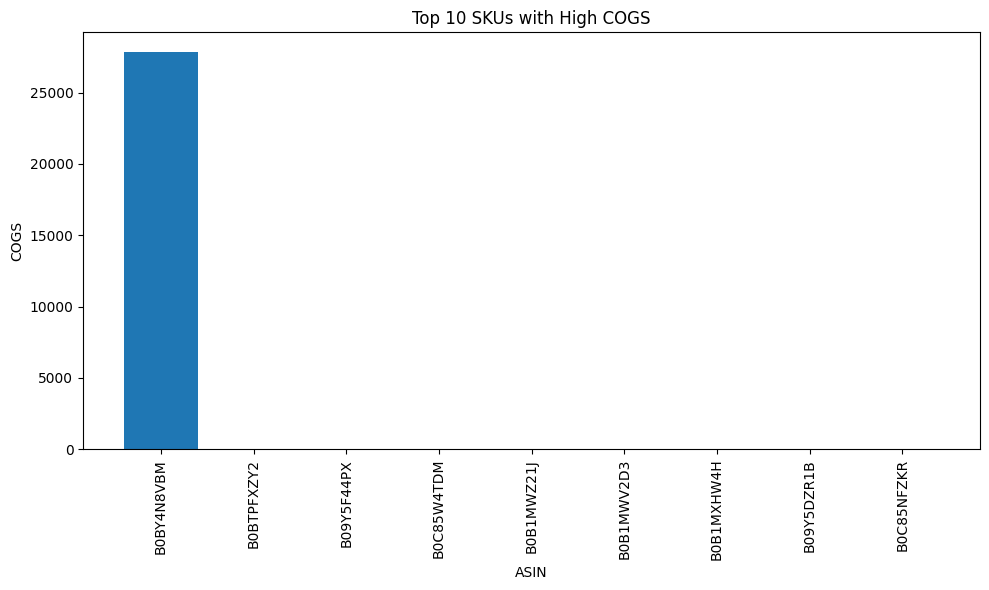

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(high_cogs_skus['ASIN'], high_cogs_skus['COGS'])
plt.title('Top 10 SKUs with High COGS')
plt.xlabel('ASIN')
plt.ylabel('COGS')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

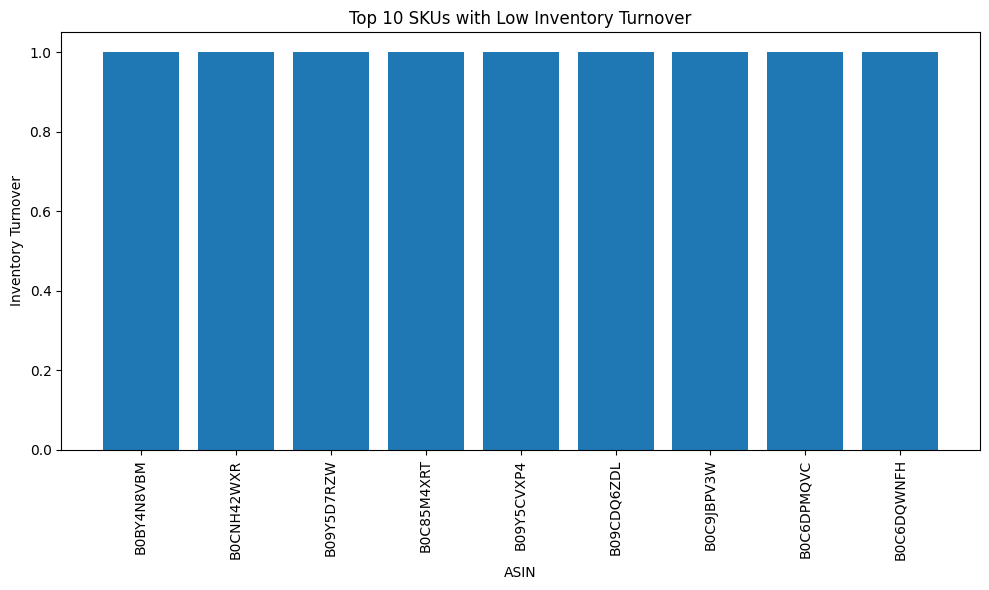

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(low_inventory_turnover_skus['ASIN'], low_inventory_turnover_skus['Inventory Turnover'])
plt.title('Top 10 SKUs with Low Inventory Turnover')
plt.xlabel('ASIN')
plt.ylabel('Inventory Turnover')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

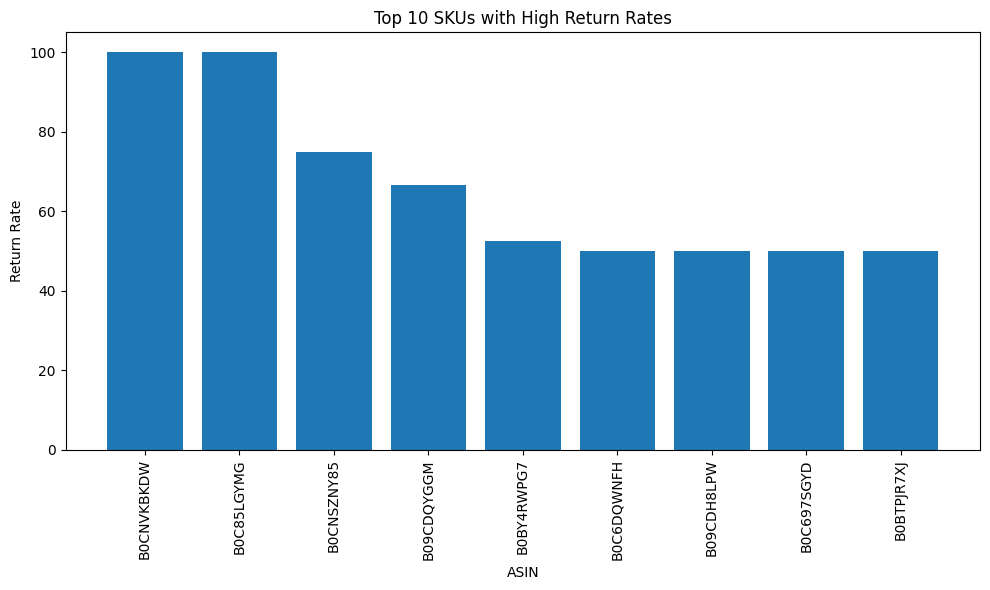

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(high_return_rate_skus['ASIN'], high_return_rate_skus['Return Rate'])
plt.title('Top 10 SKUs with High Return Rates')
plt.xlabel('ASIN')
plt.ylabel('Return Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

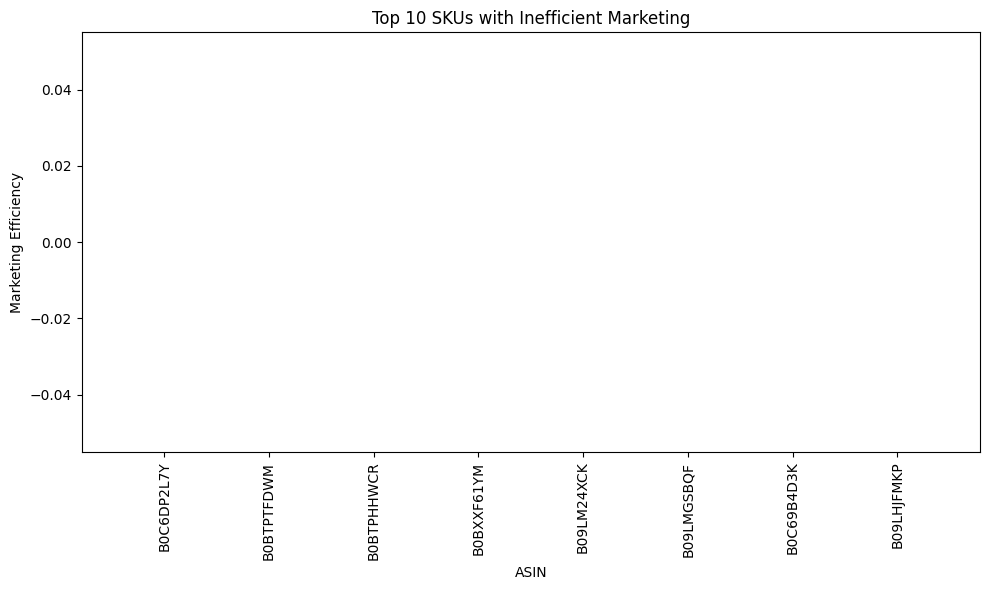

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(inefficient_marketing_skus['ASIN'], inefficient_marketing_skus['Marketing Efficiency'])
plt.title('Top 10 SKUs with Inefficient Marketing')
plt.xlabel('ASIN')
plt.ylabel('Marketing Efficiency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Sales Trends:

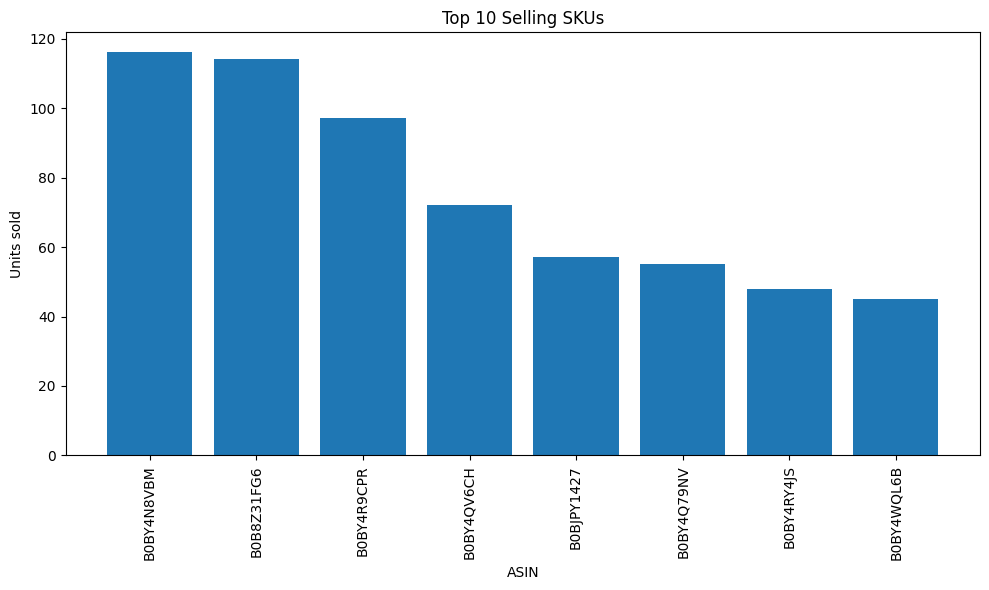

In [60]:
#Sort the data by 'Units sold' in descending order
top_selling_skus = data.sort_values(by='Units sold', ascending=False).head(10)

#Visualize the top-selling SKUs
plt.figure(figsize=(10, 6))
plt.bar(top_selling_skus['ASIN'], top_selling_skus['Units sold'])
plt.title('Top 10 Selling SKUs')
plt.xlabel('ASIN')
plt.ylabel('Units sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Profit Margins:

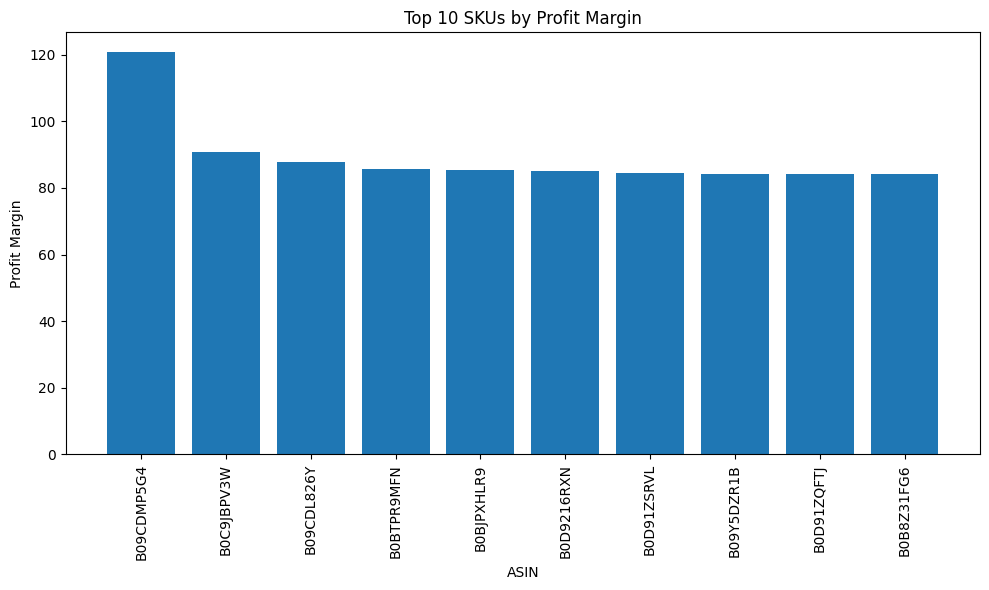

In [61]:
#Calculate the profit margin for each SKU
data['Profit Margin'] = (data['Gross Profit'] / data['Revenue']) * 100

#Sort the data by 'Profit Margin' in descending order
high_profit_skus = data.sort_values(by='Profit Margin', ascending=False).head(10)

#Visualize the SKUs with the highest profit margins
plt.figure(figsize=(10, 6))
plt.bar(high_profit_skus['ASIN'], high_profit_skus['Profit Margin'])
plt.title('Top 10 SKUs by Profit Margin')
plt.xlabel('ASIN')
plt.ylabel('Profit Margin')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Inventory Turnover:

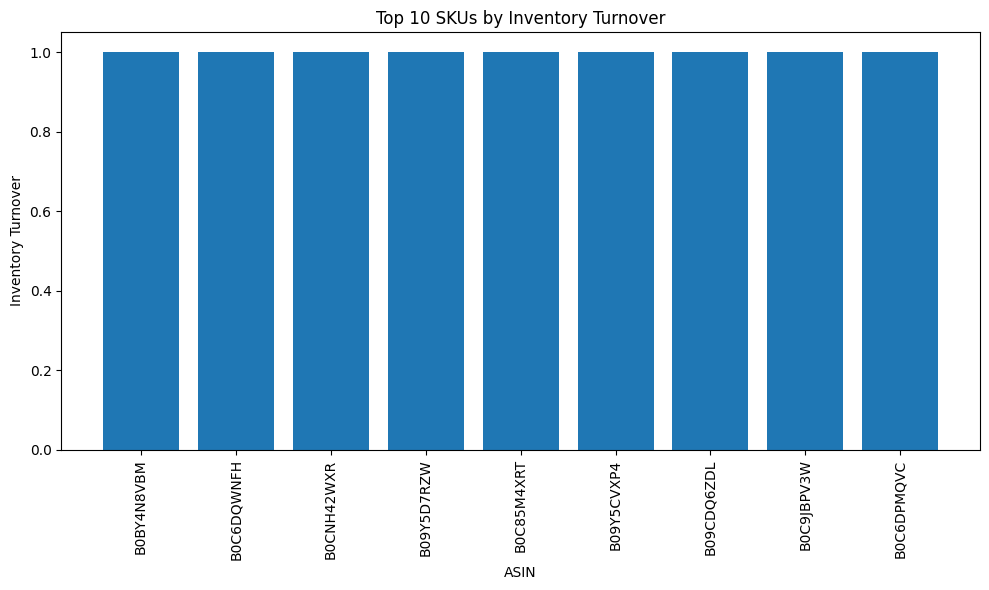

In [62]:
#Calculate the inventory turnover for each SKU
data['Inventory Turnover'] = data['Units sold'] / data['Inventory Levels']

#Sort the data by 'Inventory Turnover' in descending order
high_turnover_skus = data.sort_values(by='Inventory Turnover', ascending=False).head(10)

#Visualize the SKUs with the highest inventory turnover
plt.figure(figsize=(10, 6))
plt.bar(high_turnover_skus['ASIN'], high_turnover_skus['Inventory Turnover'])
plt.title('Top 10 SKUs by Inventory Turnover')
plt.xlabel('ASIN')
plt.ylabel('Inventory Turnover')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Return Rates:

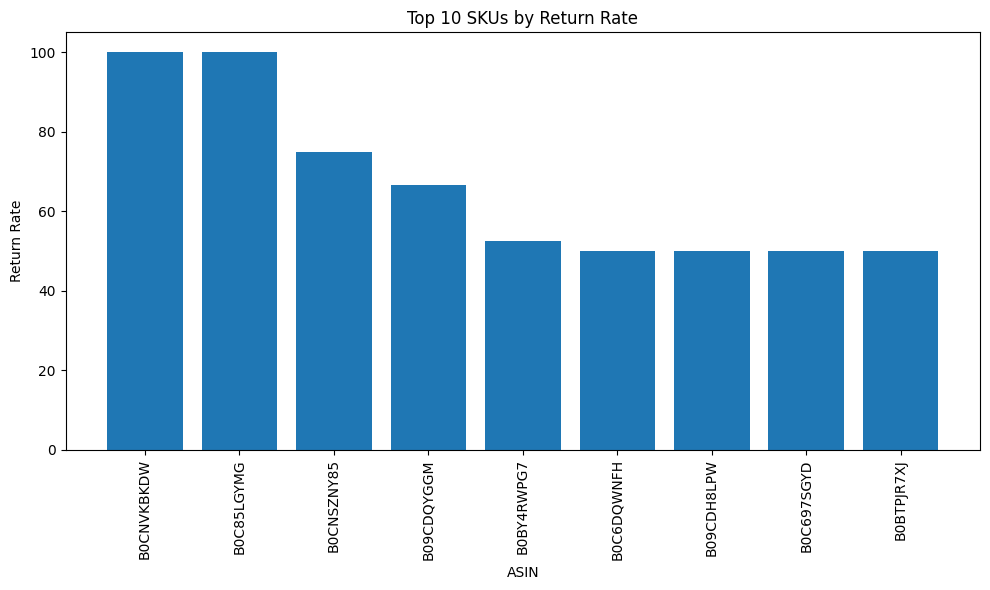

In [63]:
#Calculate the return rate for each SKU
data['Return Rate'] = (data['Returns and Refunds'] / data['Units sold']) * 100

#Sort the data by 'Return Rate' in descending order
high_return_skus = data.sort_values(by='Return Rate', ascending=False).head(10)

#Visualize the SKUs with the highest return rates
plt.figure(figsize=(10, 6))
plt.bar(high_return_skus['ASIN'], high_return_skus['Return Rate'])
plt.title('Top 10 SKUs by Return Rate')
plt.xlabel('ASIN')
plt.ylabel('Return Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Marketing Efficiency:

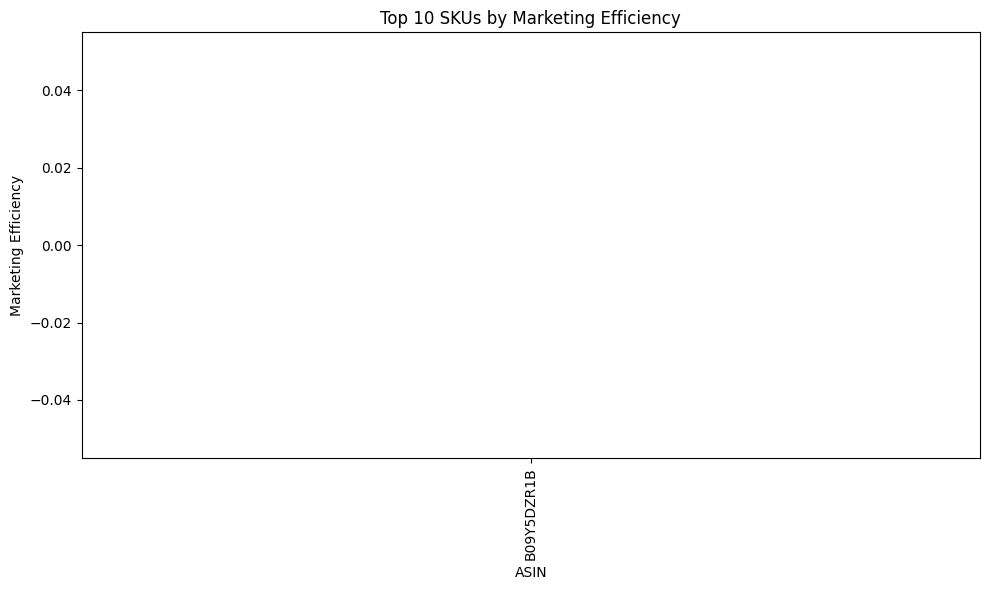

In [64]:
#Calculate the marketing efficiency for each SKU
data['Marketing Efficiency'] = data['Revenue'] / data['Marketing Spend']

#Sort the data by 'Marketing Efficiency' in descending order
high_efficiency_skus = data.sort_values(by='Marketing Efficiency', ascending=False).head(10)

#Visualize the SKUs with the highest marketing efficiency
plt.figure(figsize=(10, 6))
plt.bar(high_efficiency_skus['ASIN'], high_efficiency_skus['Marketing Efficiency'])
plt.title('Top 10 SKUs by Marketing Efficiency')
plt.xlabel('ASIN')
plt.ylabel('Marketing Efficiency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Profitability Analysis:

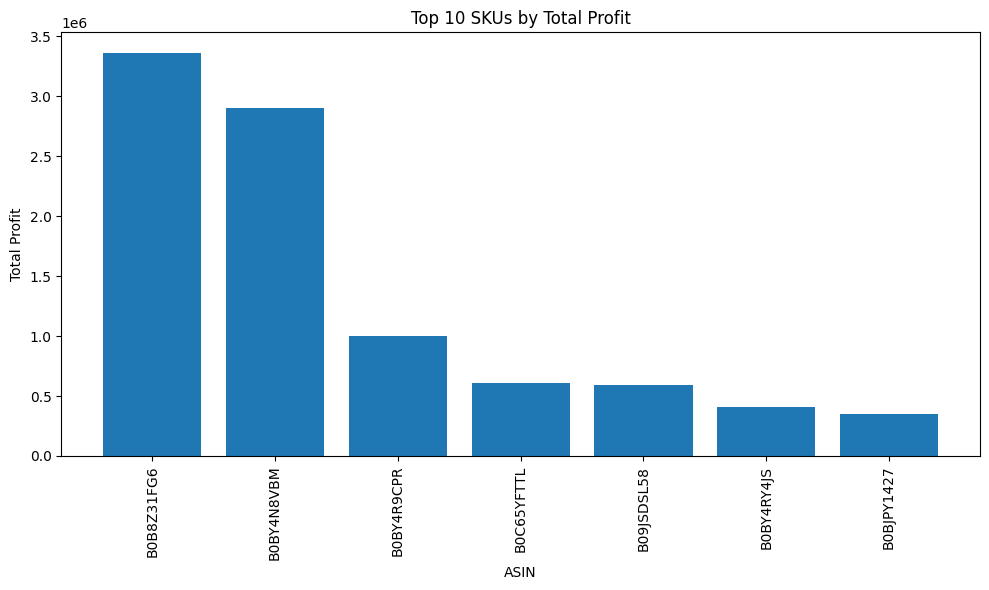

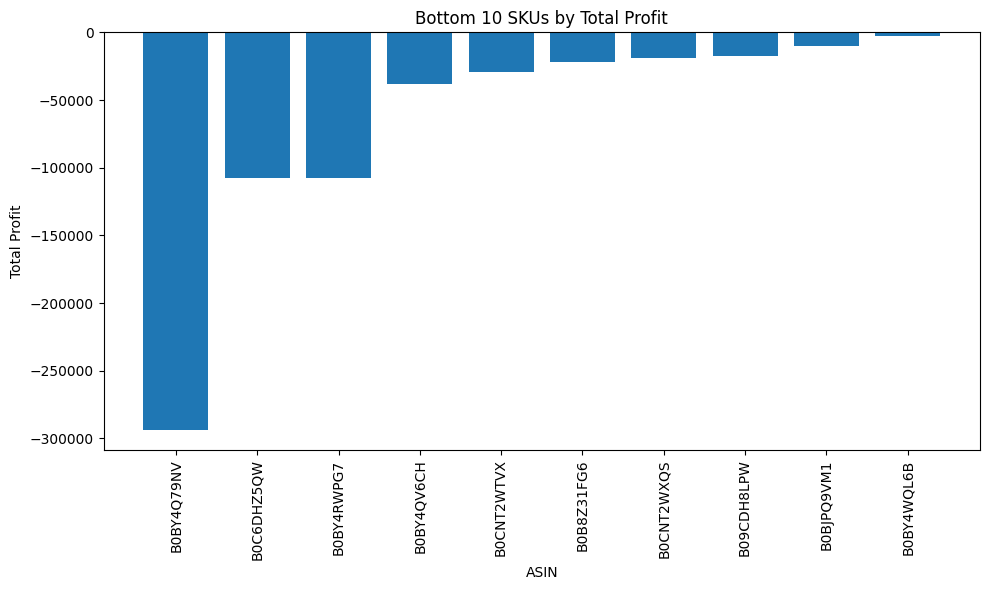

In [65]:
#Calculate the total profit for each SKU
data['Total Profit'] = data['Gross Profit'] * data['Units sold']

#Sort the data by 'Total Profit' in descending order
top_profit_skus = data.sort_values(by='Total Profit', ascending=False).head(10)

#Visualize the top 10 SKUs that contribute the most to overall profitability
plt.figure(figsize=(10, 6))
plt.bar(top_profit_skus['ASIN'], top_profit_skus['Total Profit'])
plt.title('Top 10 SKUs by Total Profit')
plt.xlabel('ASIN')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Sort the data by 'Total Profit' in ascending order
bottom_profit_skus = data.sort_values(by='Total Profit', ascending=True).head(10)

#Visualize the bottom 10 SKUs that contribute the least to overall profitability
plt.figure(figsize=(10, 6))
plt.bar(bottom_profit_skus['ASIN'], bottom_profit_skus['Total Profit'])
plt.title('Bottom 10 SKUs by Total Profit')
plt.xlabel('ASIN')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Cost Control:

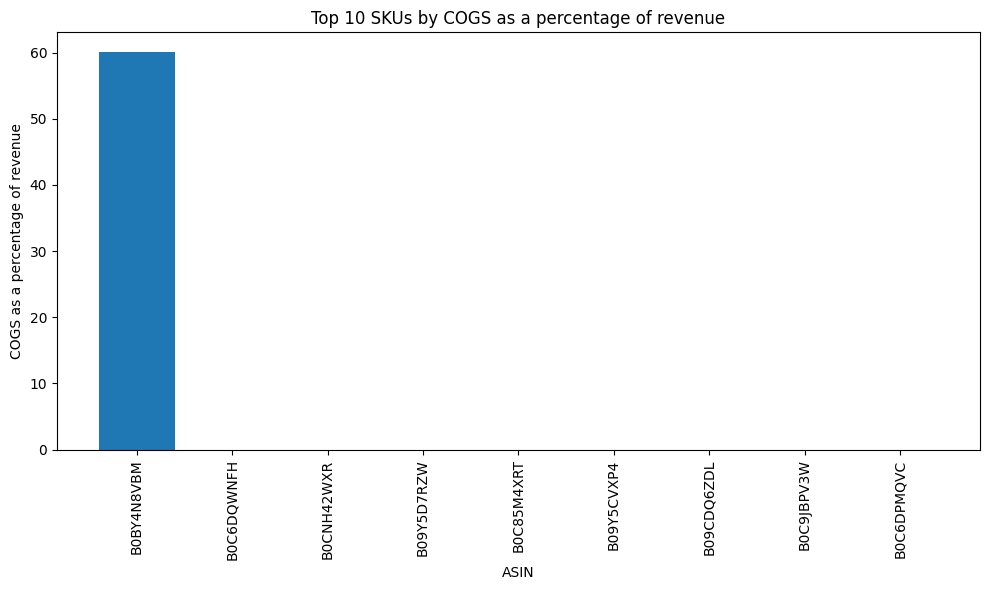

In [66]:
#Calculate the COGS as a percentage of revenue for each SKU
data['COGS as a percentage of revenue'] = (data['COGS'] / data['Revenue']) * 100

#Sort the data by 'COGS as a percentage of revenue' in descending order
high_cogs_skus = data.sort_values(by='COGS as a percentage of revenue', ascending=False).head(10)

#Visualize the top 10 SKUs where COGS is disproportionately high compared to revenue
plt.figure(figsize=(10, 6))
plt.bar(high_cogs_skus['ASIN'], high_cogs_skus['COGS as a percentage of revenue'])
plt.title('Top 10 SKUs by COGS as a percentage of revenue')
plt.xlabel('ASIN')
plt.ylabel('COGS as a percentage of revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Inventory Optimisation:

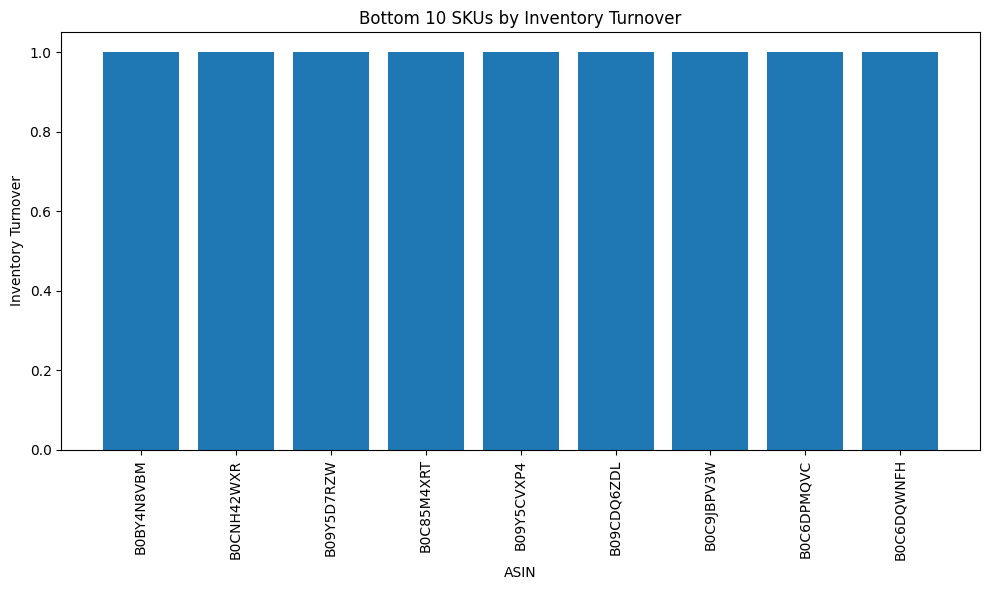

Suggestions for better inventory management:
1. Reduce inventory levels for SKUs with low inventory turnover.
2. Increase sales for SKUs with low inventory turnover.
3. Implement just-in-time inventory management for SKUs with low inventory turnover.


In [67]:
#Calculate the inventory turnover for each SKU
data['Inventory Turnover'] = data['Units sold'] / data['Inventory Levels']

#Sort the data by 'Inventory Turnover' in ascending order
low_turnover_skus = data.sort_values(by='Inventory Turnover', ascending=True).head(10)

#Visualize the bottom 10 SKUs with low inventory turnover
plt.figure(figsize=(10, 6))
plt.bar(low_turnover_skus['ASIN'], low_turnover_skus['Inventory Turnover'])
plt.title('Bottom 10 SKUs by Inventory Turnover')
plt.xlabel('ASIN')
plt.ylabel('Inventory Turnover')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Suggest improvements for better inventory management
print("Suggestions for better inventory management:")
print("1. Reduce inventory levels for SKUs with low inventory turnover.")
print("2. Increase sales for SKUs with low inventory turnover.")
print("3. Implement just-in-time inventory management for SKUs with low inventory turnover.")

#Summary Report:

In [71]:
#Summary Report
print("Summary Report:")
print("Top 10 SKUs by Sales:")
print(top_selling_skus[['ASIN', 'Units sold']])
print("\nTop 10 SKUs by Profit:")
print(top_profit_skus[['ASIN', 'Total Profit']])
print("\nTop 10 SKUs by Inventory Turnover:")
print(high_turnover_skus[['ASIN', 'Inventory Turnover']])

#Calculate the bottom 10 SKUs by sales, profit, and inventory turnover
bottom_selling_skus = data.sort_values(by='Units sold', ascending=True).head(10)
bottom_profit_skus = data.sort_values(by='Total Profit', ascending=True).head(10)
low_turnover_skus = data.sort_values(by='Inventory Turnover', ascending=True).head(10)

print("\nBottom 10 SKUs by Sales:")
print(bottom_selling_skus[['ASIN', 'Units sold']])
print("\nBottom 10 SKUs by Profit:")
print(bottom_profit_skus[['ASIN', 'Total Profit']])
print("\nBottom 10 SKUs by Inventory Turnover:")
print(low_turnover_skus[['ASIN', 'Inventory Turnover']])

Summary Report:
Top 10 SKUs by Sales:
         ASIN  Units sold
0  B0BY4N8VBM         116
1  B0B8Z31FG6         114
2  B0BY4R9CPR          97
3  B0B8Z31FG6          85
4  B0BY4QV6CH          72
5  B0BY4R9CPR          66
6  B0BJPY1427          57
7  B0BY4Q79NV          55
8  B0BY4RY4JS          48
9  B0BY4WQL6B          45

Top 10 SKUs by Profit:
          ASIN  Total Profit
1   B0B8Z31FG6  3.364754e+06
0   B0BY4N8VBM  2.904776e+06
3   B0B8Z31FG6  1.850230e+06
5   B0BY4R9CPR  1.000466e+06
2   B0BY4R9CPR  8.758422e+05
11  B0C65YFTTL  6.091963e+05
12  B09JSDSL58  5.956878e+05
8   B0BY4RY4JS  4.091016e+05
6   B0BJPY1427  3.463599e+05
14  B0BY4N8VBM  3.345381e+05

Top 10 SKUs by Inventory Turnover:
           ASIN  Inventory Turnover
0    B0BY4N8VBM                 1.0
116  B0C6DQWNFH                 1.0
108  B0CNH42WXR                 1.0
109  B09Y5D7RZW                 1.0
110  B0C85M4XRT                 1.0
111  B09Y5CVXP4                 1.0
112  B09Y5CVXP4                 1.0
113  B09C

##Actionable Insights or Recommendations :

In [74]:
#Actionable Insights or Recommendations
print("\nActionable Insights or Recommendations:")
print("1. Increase ROAS by optimizing marketing campaigns for top-selling SKUs.")
print("2. Reduce inventory levels for SKUs with low inventory turnover.")
print("3. Implement just-in-time inventory management for SKUs with low inventory turnover.")
print("4. Increase sales for SKUs with low sales by offering promotions or discounts.")
print("5. Improve inventory management by implementing a first-in, first-out (FIFO) inventory system.")

#Calculate the bottom 10 SKUs by sales, profit, and inventory turnover
bottom_selling_skus = data.sort_values(by='Units sold', ascending=True).head(10)
bottom_profit_skus = data.sort_values(by='Total Profit', ascending=True).head(10)
low_turnover_skus = data.sort_values(by='Inventory Turnover', ascending=True).head(10)



Actionable Insights or Recommendations:
1. Increase ROAS by optimizing marketing campaigns for top-selling SKUs.
2. Reduce inventory levels for SKUs with low inventory turnover.
3. Implement just-in-time inventory management for SKUs with low inventory turnover.
4. Increase sales for SKUs with low sales by offering promotions or discounts.
5. Improve inventory management by implementing a first-in, first-out (FIFO) inventory system.


#Visual Representation:

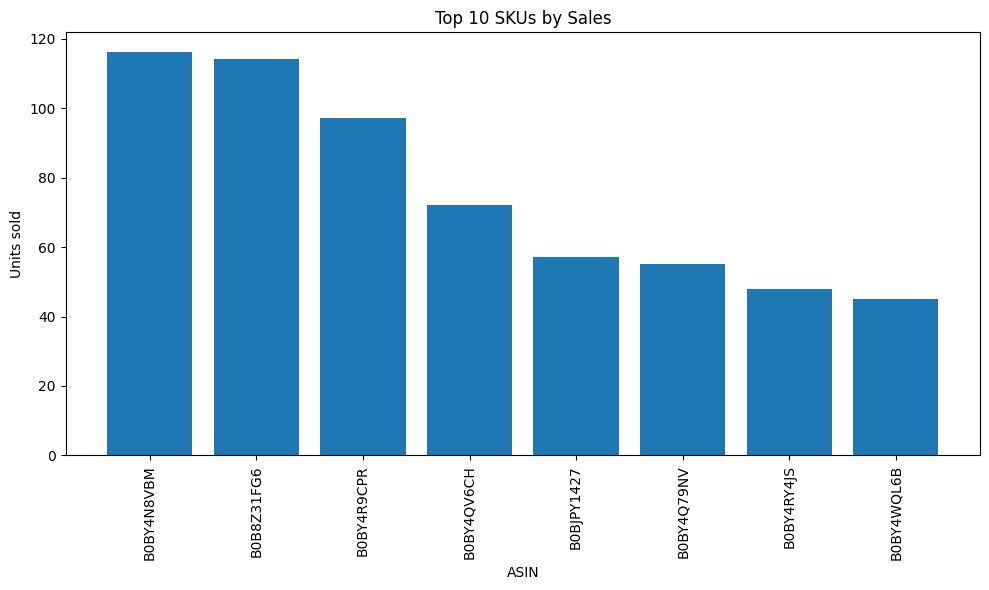

In [75]:
#Visual Representation
plt.figure(figsize=(10, 6))
plt.bar(top_selling_skus['ASIN'], top_selling_skus['Units sold'])
plt.title('Top 10 SKUs by Sales')
plt.xlabel('ASIN')
plt.ylabel('Units sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

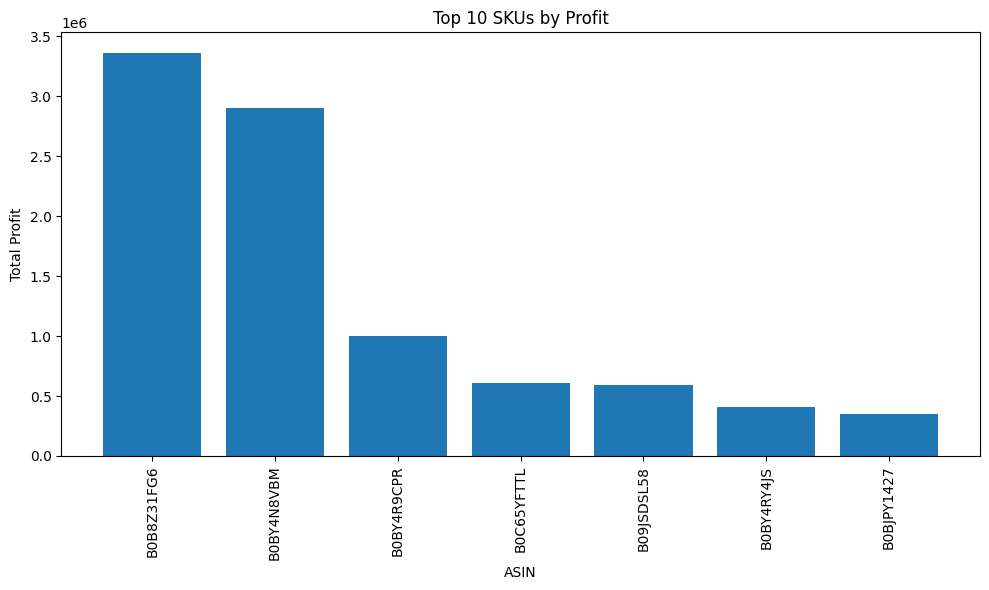

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(top_profit_skus['ASIN'], top_profit_skus['Total Profit'])
plt.title('Top 10 SKUs by Profit')
plt.xlabel('ASIN')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

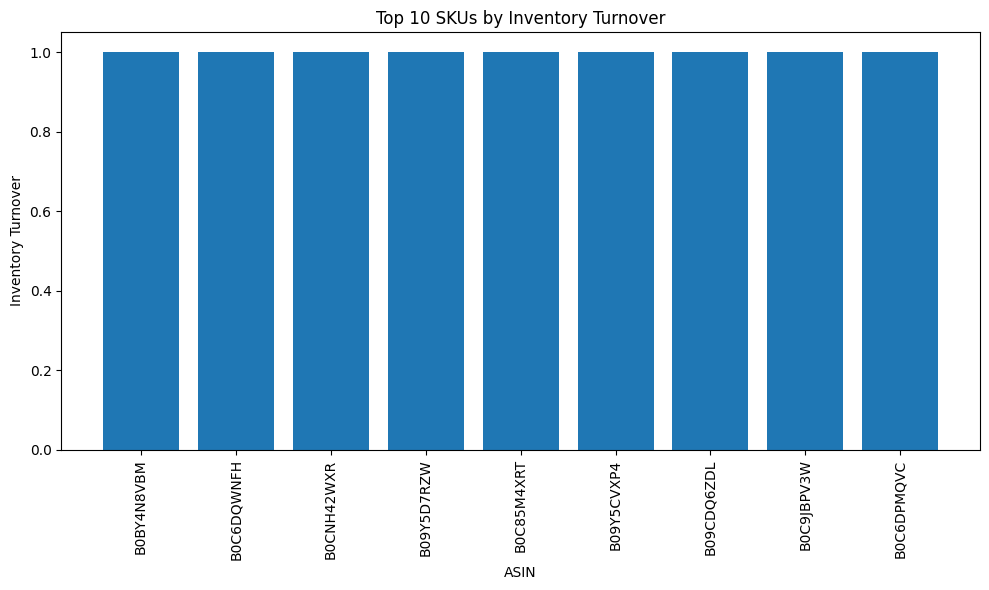

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(high_turnover_skus['ASIN'], high_turnover_skus['Inventory Turnover'])
plt.title('Top 10 SKUs by Inventory Turnover')
plt.xlabel('ASIN')
plt.ylabel('Inventory Turnover')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

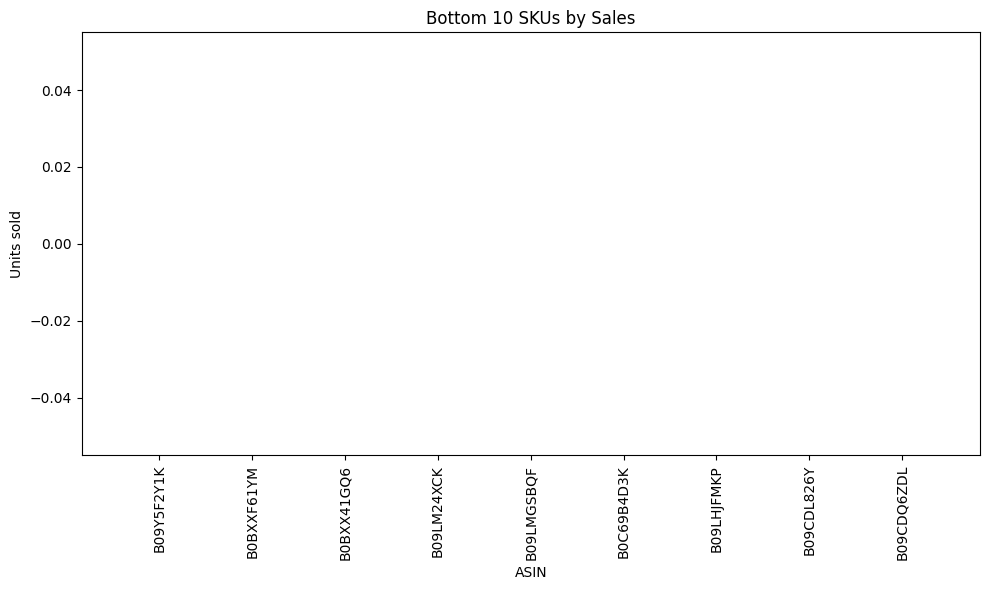

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(bottom_selling_skus['ASIN'], bottom_selling_skus['Units sold'])
plt.title('Bottom 10 SKUs by Sales')
plt.xlabel('ASIN')
plt.ylabel('Units sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

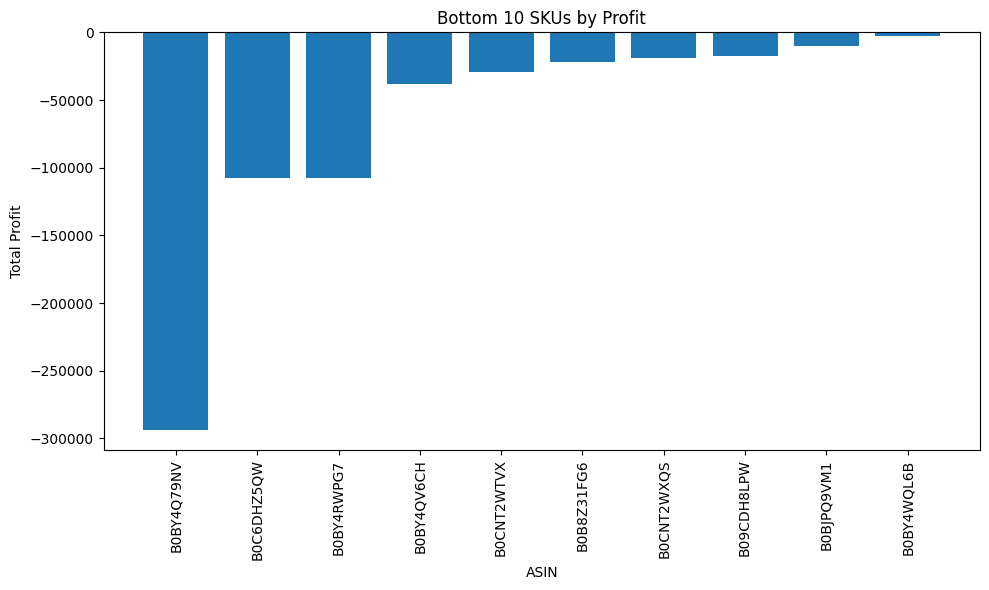

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(bottom_profit_skus['ASIN'], bottom_profit_skus['Total Profit'])
plt.title('Bottom 10 SKUs by Profit')
plt.xlabel('ASIN')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

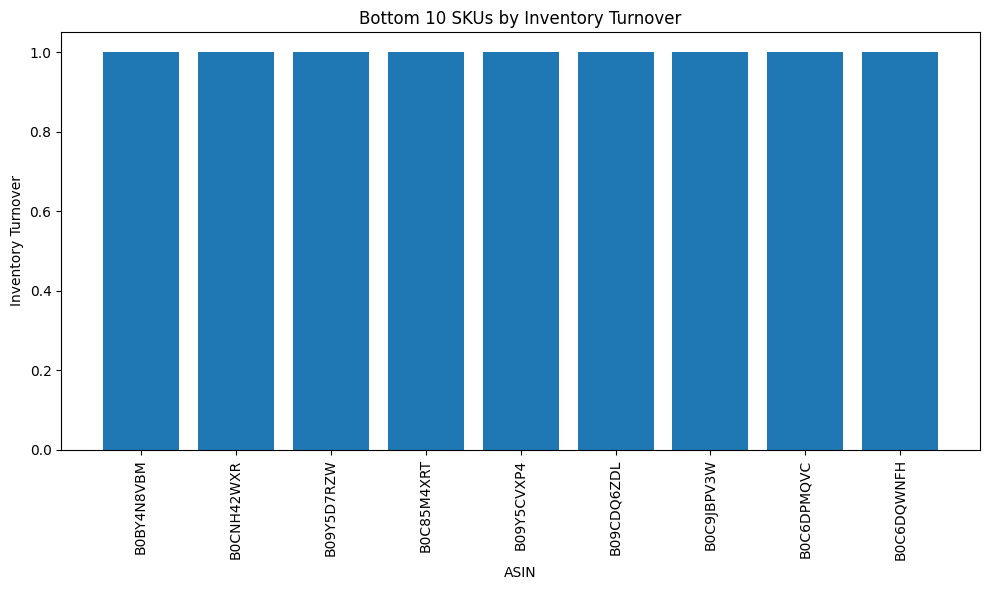

In [80]:
plt.figure(figsize=(10, 6))
plt.bar(low_turnover_skus['ASIN'], low_turnover_skus['Inventory Turnover'])
plt.title('Bottom 10 SKUs by Inventory Turnover')
plt.xlabel('ASIN')
plt.ylabel('Inventory Turnover')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()